In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
from scipy.stats import f
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Подготовка данных


Мы видим что из 5 колонок нам нужны только Time, Germany[DEU] остальные мы можем удалить


In [5]:
gpd_df = pd.read_excel('GDP.xlsx')

In [6]:
names_to_drop = ['Series Name', 'Series Code', 'Time Code']

In [7]:
cleaned_gpd = gpd_df.drop(names_to_drop, axis=1)
cleaned_gpd = cleaned_gpd.dropna(how='any')
cleaned_gpd.rename(columns={'Germany [DEU]':'GPD'},inplace=True)

In [8]:
cleaned_gpd

,Time,GPD
0,1960.0,8.431095e+10
1,1961.0,9.620573e+10
2,1962.0,1.055089e+11
3,1963.0,1.118228e+11
4,1964.0,1.228802e+11
...,...,...
59,2019.0,3.889178e+12
60,2020.0,3.887727e+12
61,2021.0,4.278504e+12
62,2022.0,4.082469e+12


# Анализ динамики безработицы


In [24]:
gdp2 = pd.read_csv('gdp.csv')

In [25]:
gdp2.shape,cleaned_gpd.shape

((53, 2), (33, 2))

In [26]:
gpd1 = cleaned_gpd.iloc[20:63]
gpd1 = gpd1[::-1]
gpd1['Time'] = gpd1['Time'].astype(int).astype(str)

In [27]:
gpd1

,Time,GPD
63,2023,4.456081e+12
62,2022,4.082469e+12
61,2021,4.278504e+12
60,2020,3.887727e+12
59,2019,3.889178e+12
58,2018,3.974443e+12
57,2017,3.690849e+12
56,2016,3.469853e+12
55,2015,3.357586e+12
54,2014,3.889093e+12


In [28]:
gdp2.rename(columns={'year':'Time'},inplace=True)
gdp2['Time'] = gdp2['Time'].astype(int).astype(str)

In [29]:
gdp2

,Time,gdp
0,2022,4.072192e+12
1,2021,4.259935e+12
2,2020,3.889669e+12
3,2019,3.888226e+12
4,2018,3.974443e+12
5,2017,3.690849e+12
6,2016,3.469853e+12
7,2015,3.357586e+12
8,2014,3.889093e+12
9,2013,3.733805e+12


In [30]:
merged_df1 = pd.merge(gpd1, gdp2, on='Time', how='inner')
GDP1 = merged_df1.iloc[:, 1].to_numpy()
GDP2 = merged_df1.iloc[:, 2].to_numpy()

In [31]:
GDP1, GDP2

(array([4.08246949e+12, 4.27850393e+12, 3.88772716e+12, 3.88917759e+12,
        3.97444336e+12, 3.69084915e+12, 3.46985346e+12, 3.35758572e+12,
        3.88909305e+12, 3.73380465e+12, 3.52714319e+12, 3.74931499e+12]),
 array([4.07219174e+12, 4.25993491e+12, 3.88966890e+12, 3.88822604e+12,
        3.97444336e+12, 3.69084915e+12, 3.46985346e+12, 3.35758572e+12,
        3.88909305e+12, 3.73380465e+12, 3.52714319e+12, 3.74931499e+12]))

In [32]:
merged_df1.head()

,Time,GPD,gdp
0,2022,4.082469e+12,4.072192e+12
1,2021,4.278504e+12,4.259935e+12
2,2020,3.887727e+12,3.889669e+12
3,2019,3.889178e+12,3.888226e+12
4,2018,3.974443e+12,3.974443e+12


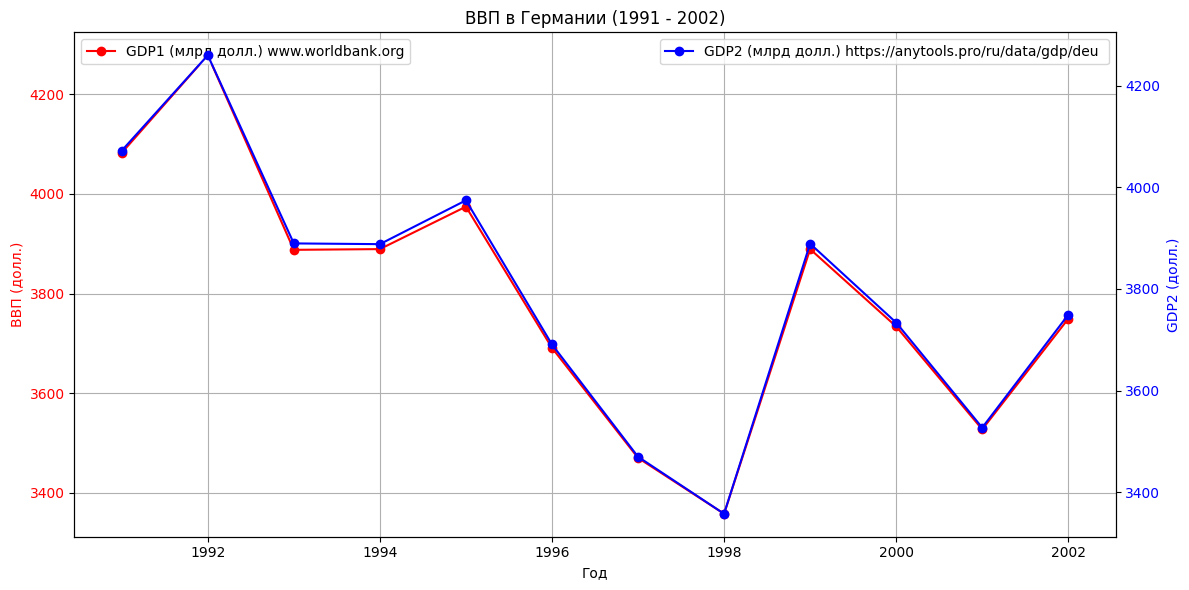

In [35]:
years = np.arange(1991, len(GDP1) + 1991) # Убедитесь в правильном диапазоне лет
# Создание графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Настройка первой оси (ВВП)
color = 'r'
ax1.set_xlabel('Год')
ax1.set_ylabel('ВВП (долл.)', color=color)
ax1.plot(years, GDP1 / 1e9, color=color, marker='o', label='GDP1 (млрд долл.) www.worldbank.org') # Делим на миллиард для удобства
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Настройка второй оси (GDP2)
ax2 = ax1.twinx()
color = 'b'
ax2.set_ylabel('GDP2 (долл.)', color=color)
ax2.plot(years, GDP2 / 1e9, color=color, marker='o', label='GDP2 (млрд долл.) https://anytools.pro/ru/data/gdp/deu ') # Делим на миллиард для удобства
ax2.tick_params(axis='y', labelcolor=color)

# Заголовок и оформление
plt.title('ВВП в Германии (1991 - {})'.format(years[-1]))
fig.tight_layout()

# Легенды
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Показать график
plt.show()

Аналогично обработаем файл Unemployment.xlsx

In [10]:
unemp_df = pd.read_excel('Unemployment.xlsx')

In [11]:
unemp_df.head()

,Series Name,Series Code,Time,Time Code,Germany [DEU]
0,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991.0,YR1991,5.316
1,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1992.0,YR1992,6.323
2,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1993.0,YR1993,7.675
3,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1994.0,YR1994,8.727
4,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1995.0,YR1995,8.158


In [12]:
cleaned_unemp_df = unemp_df.drop(names_to_drop, axis=1)


In [13]:
cleaned_unemp_df = cleaned_unemp_df.dropna(how='any')
cleaned_unemp_df.rename(columns={'Germany [DEU]':'Unemployment'},inplace=True)

<ipython-input-13-43af2bc81f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_unemp_df.rename(columns={'Germany [DEU]':'Unemployment'},inplace=True)


In [14]:
cleaned_unemp_df.head()

,Time,Unemployment
0,1991.0,5.316
1,1992.0,6.323
2,1993.0,7.675
3,1994.0,8.727
4,1995.0,8.158


Теперь преобразуем 2 таблицы в общую

In [15]:
cleaned_gpd.shape, cleaned_unemp_df.shape

((64, 2), (33, 2))

In [16]:
cleaned_gpd = cleaned_gpd.iloc[31:]

In [17]:
merged_df = pd.merge(cleaned_gpd, cleaned_unemp_df, on='Time', how='inner')

In [18]:
merged_df.head()


,Time,GPD,Unemployment
0,1991.0,1.868945e+12,5.316
1,1992.0,2.131572e+12,6.323
2,1993.0,2.071324e+12,7.675
3,1994.0,2.205074e+12,8.727
4,1995.0,2.585792e+12,8.158


In [19]:
merged_df['GPD (млрд долл)'] = (merged_df['GPD']/ 1000000000).round(2)
merged_df['Unemployment (%)'] = (merged_df['Unemployment']).round(2)
merged_df['Time'] = merged_df['Time'].astype(int).astype(str)
merged_df['GPD'] = merged_df['GPD'].astype(float).astype(str)
merged_df['Unemployment'] = merged_df['Unemployment'].astype(float).astype(str)

In [78]:
df = merged_df.drop(['Unemployment','GPD'],axis=1)

In [79]:
df.iloc[0:63:5]

,Time,GPD (млрд долл),Unemployment (%)
0,1991,1868.95,5.32
5,1996,2497.24,8.82
10,2001,1945.79,7.77
15,2006,2994.70,10.25
20,2011,3749.31,5.82
25,2016,3469.85,4.12
30,2021,4278.50,3.64


In [36]:
df.to_excel('out_put.xlsx')

# 1991-2023


In [37]:
GDP = df.iloc[:, 1].to_numpy()
Unemployment = df.iloc[:, 2].to_numpy()
n = len(GDP)
GDP, Unemployment

(array([1868.95, 2131.57, 2071.32, 2205.07, 2585.79, 2497.24, 2211.99,
        2238.99, 2194.95, 1947.98, 1945.79, 2078.48, 2501.64, 2814.35,
        2846.86, 2994.7 , 3425.58, 3745.26, 3411.26, 3399.67, 3749.31,
        3527.14, 3733.8 , 3889.09, 3357.59, 3469.85, 3690.85, 3974.44,
        3889.18, 3887.73, 4278.5 , 4082.47, 4456.08]),
 array([ 5.32,  6.32,  7.68,  8.73,  8.16,  8.82,  9.86,  9.79,  8.85,
         7.92,  7.77,  8.48,  9.78, 10.73, 11.17, 10.25,  8.66,  7.52,
         7.74,  6.97,  5.82,  5.38,  5.23,  4.98,  4.62,  4.12,  3.75,
         3.38,  3.14,  3.86,  3.64,  3.14,  3.04]))

((33,), (33,))

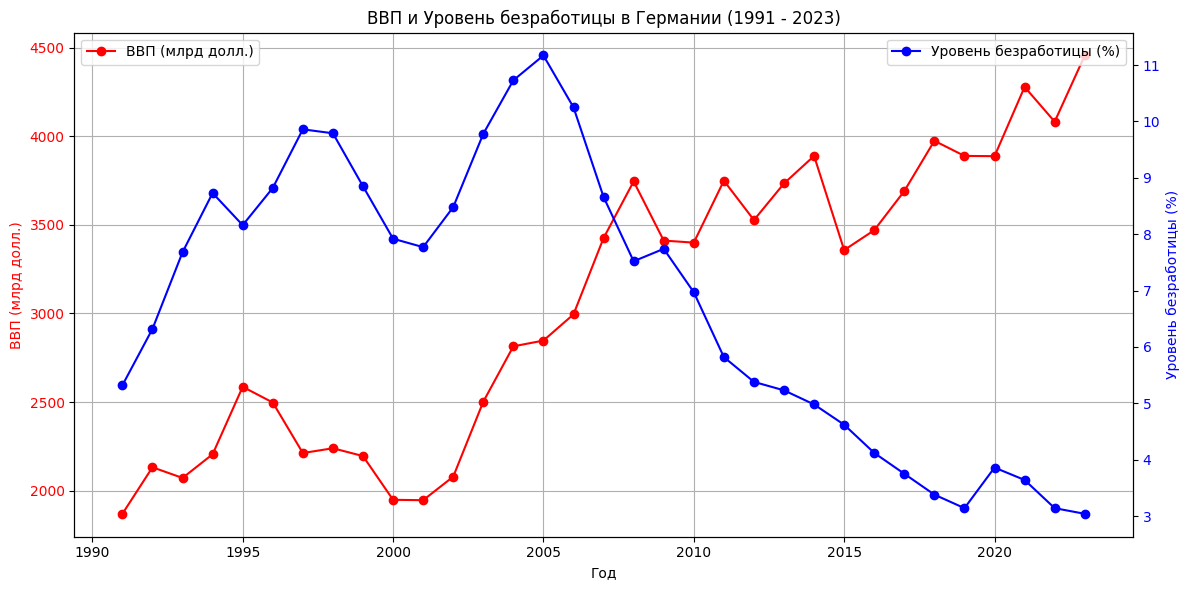

In [38]:
years = np.arange(1991, 2024)

# Создание графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Настройка первой оси (ВВП)
color = 'r'
ax1.set_xlabel('Год')
ax1.set_ylabel('ВВП (млрд долл.)', color=color)
ax1.plot(years, GDP, color=color, marker='o', label='ВВП (млрд долл.)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Настройка второй оси (Уровень безработицы)
ax2 = ax1.twinx()
color = 'b'
ax2.set_ylabel('Уровень безработицы (%)', color=color)
ax2.plot(years, Unemployment, color=color, marker='o', label='Уровень безработицы (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Заголовок и оформление
plt.title('ВВП и Уровень безработицы в Германии (1991 - 2023)')
fig.tight_layout()

# Легенды
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Показать график
plt.show()


 Из анализа графика видно, что данные о ВВП и уровне безработицы до 1995 года не оказывают значительного влияния на общий результат. В этот период наблюдается прямая пропорциональная зависимость между ростом ВВП и уровнем безработицы, что указывает на то, что эти данные могут быть исключены из дальнейшего анализа. С 1995 года тенденции начинают изменяться, и их влияние на экономические показатели становится более выраженным.

In [39]:
data = df.iloc[4:]

In [40]:
data.head()

,Time,GPD (млрд долл),Unemployment (%)
4,1995,2585.79,8.16
5,1996,2497.24,8.82
6,1997,2211.99,9.86
7,1998,2238.99,9.79
8,1999,2194.95,8.85


In [ ]:
data.to_excel('/output.xlsx')

## 1) Расчитаем Rxy


H0 связи нет Rxy = 0
Н1 связь есть Rxy != 0

In [41]:
GDP = data.iloc[:, 1].to_numpy()
Unemployment = data.iloc[:, 2].to_numpy()
n = len(GDP)
GDP, Unemployment

(array([2585.79, 2497.24, 2211.99, 2238.99, 2194.95, 1947.98, 1945.79,
        2078.48, 2501.64, 2814.35, 2846.86, 2994.7 , 3425.58, 3745.26,
        3411.26, 3399.67, 3749.31, 3527.14, 3733.8 , 3889.09, 3357.59,
        3469.85, 3690.85, 3974.44, 3889.18, 3887.73, 4278.5 , 4082.47,
        4456.08]),
 array([ 8.16,  8.82,  9.86,  9.79,  8.85,  7.92,  7.77,  8.48,  9.78,
        10.73, 11.17, 10.25,  8.66,  7.52,  7.74,  6.97,  5.82,  5.38,
         5.23,  4.98,  4.62,  4.12,  3.75,  3.38,  3.14,  3.86,  3.64,
         3.14,  3.04]))

In [42]:
gamma, p_value  = stats.pearsonr(Unemployment, GDP)
print(f'Коэффицент корреляции: {gamma}')

t_rasch = stats.t.ppf(1 - p_value / 2, n - 2)
print(f'Расчетное распределение стъюдента: {t_rasch}')

alpha = 0.05
t_tabl = t.ppf(1 - alpha / 2, n - 2)
print(f'Табличное распределение стъюдента: {t_tabl}')

Коэффицент корреляции: -0.7833498154468866
Расчетное распределение стъюдента: 6.548469743958641
Табличное распределение стъюдента: 2.0518305164802833




*   Сильная обратная связ Rxy -0.7833498154468866 > -1
*   t_расч > t_табл (6.548469743958641 > 2.0518305164802833)
        Следовательно мы можем отмести Н0, следовательно rxy статистически значим

# 2) построение уравнения парной линейной регрессии

In [43]:
def predict_y(b0, b1, x):
    return b0 + b1*x

In [44]:
def regression_std(y, pred_y, n):
    return (np.sum((y - y_pred)**2) / (n - 2))**0.5

In [45]:
def create_S_b0(S, x, n):
    return S * (np.sum(x**2) / (n * np.sum((x - x.mean())**2)))**0.5

In [46]:
def create_S_b1(S, x):
    return S * (1 / np.sum((x - x.mean())**2))**0.5

In [47]:
model = LinearRegression()

In [48]:
model.fit(Unemployment.reshape(-1, 1), GDP.reshape(-1, 1))

LinearRegression()

In [49]:
b0 = model.intercept_[0]
b0

4721.776079777426

In [50]:
b1 = model.coef_[0][0]
b1

-224.37272378056355

In [51]:
y_pred = predict_y(b0, b1, Unemployment)

In [52]:
S = regression_std(GDP, y_pred, n)
S

478.3408894343956

In [53]:
S_b0 = create_S_b0(S, Unemployment, n)
S_b0

248.65339472008708

In [54]:
S_b1 = create_S_b1(S, Unemployment)
S_b1

34.2633825230828

In [55]:
t_rasch_b0 = b0 / S_b0
t_rasch_b0, t_tabl

(18.989389165962532, 2.0518305164802833)

In [56]:
t_rasch_b1 = b1 / S_b1
abs(t_rasch_b1), t_tabl

(6.5484697440308635, 2.0518305164802833)

b0_rasch > b0_tabl b1_rasch > b1_tabl ==> b0 и b1 статистически значимы, Н0 для b0, b1 отвергается в обоих случаях

# 3) проверить значимость уравнения

In [57]:
alpha = 0.95
nu_1 = 1
F_tabl = f.ppf(alpha, nu_1, n - 2)

In [58]:
F_rasch = (n - 2)*gamma**2 / (1 - gamma**2)
F_rasch, F_tabl

(42.882455988487635, 4.210008468359754)

F_расч > F_табл

# => H0 отвергается => ур-е регрессии значимо

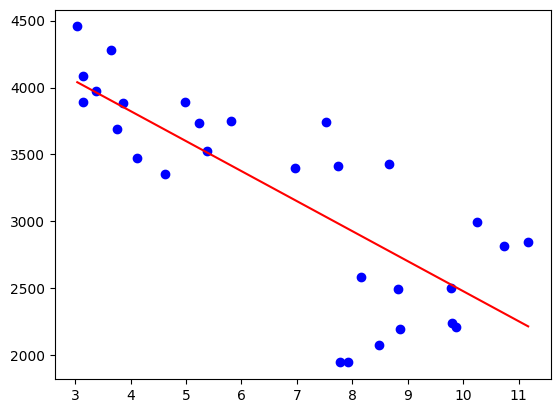

In [59]:
color = 'b'
plt.scatter(Unemployment, GDP, color=color)
xx = np.linspace(Unemployment.min(), Unemployment.max(), 100).reshape(-1, 1)
plt.plot(xx, model.predict(xx), color='r')
plt.show()

In [60]:
model.score(Unemployment.reshape(-1, 1), GDP)

0.6136369333606713

Рассчитать коэффицент Оукена

In [80]:

df

,Time,GPD (млрд долл),Unemployment (%)
0,1991,1868.95,5.32
1,1992,2131.57,6.32
2,1993,2071.32,7.68
3,1994,2205.07,8.73
4,1995,2585.79,8.16
5,1996,2497.24,8.82
6,1997,2211.99,9.86
7,1998,2238.99,9.79
8,1999,2194.95,8.85
9,2000,1947.98,7.92


In [81]:
df['Potential GDP'] = b0 + b1 * df['Unemployment (%)']

In [82]:
df


,Time,GPD (млрд долл),Unemployment (%),Potential GDP
0,1991,1868.95,5.32,3528.113189
1,1992,2131.57,6.32,3303.740465
2,1993,2071.32,7.68,2998.593561
3,1994,2205.07,8.73,2763.002201
4,1995,2585.79,8.16,2890.894654
5,1996,2497.24,8.82,2742.808656
6,1997,2211.99,9.86,2509.461023
7,1998,2238.99,9.79,2525.167114
8,1999,2194.95,8.85,2736.077474
9,2000,1947.98,7.92,2944.744107
